In [1]:
import os
import cv2

import random

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing import image

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

from tensorflow.keras.callbacks import EarlyStopping

In [2]:
physical_device = tf.config.experimental.list_physical_devices("GPU")
print("Number of GPU: {}".format(len(physical_device)))

Number of GPU: 1


In [3]:
tf.config.experimental.set_memory_growth(physical_device[0], True)

## Load image data using os and cv2

In [4]:
data_dir = ["train", "valid"]
car_type = ["Car", "Truck"]
size = 128

In [ ]:
# check one image as an example
for category in car_type:
    dir_path = os.path.join(data_dir, category)
    for image in os.listdir(dir_path): # get all files in dir_path
        image_array = cv2.imread(os.path.join(dir_path, image))
        plt.imshow(image_array)
        plt.show()
        break
    break

In [ ]:
training_data = []
X = []
y = []
# define a function to load all images and convert to dataframe
def create_training_data(directory, types, size_of_img):
    for cate in types:
        path = os.path.join(directory, cate)
        type_num = types.index(cate)
        
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                img_array_resize = cv2.resize(img_array, (size_of_img, size_of_img))
                training_data.append([img_array_resize, type_num])
            except Exception as e:
                pass
            
    random.shuffle(training_data)
    
    for img, label in training_data:
        X.append(img)
        y.append(label)

In [ ]:
create_training_data(data_dir, car_type, size)

In [ ]:
print(len(training_data))

In [ ]:
X = np.array(X)

In [ ]:
X.shape # correct shape

# otherwise:
# X.reshape(-1, size, size, 3)

In [ ]:
y.count(0)/len(y)

## Load data by tensorflow load_img

In [5]:
training_data = []
X = []
y = []

def create_training_tf(directory, types, size_of_img, image_dataset):
    for d_dir in directory:
        for cate in types:
            type_num = types.index(cate)
            path = os.path.join(d_dir, cate)
        
            for img in os.listdir(path):
                try:
                    img_loadin = image.load_img(os.path.join(path, img), color_mode= "rgb", target_size = (size_of_img, size_of_img))
                    img_array = image.img_to_array(img_loadin)
                    image_dataset.append([img_array, type_num])
            
                except Exception as e:
                    pass
            
    random.shuffle(image_dataset)

    for img, label in image_dataset:
        X.append(img)
        y.append(label)

In [6]:
create_training_tf(data_dir, car_type, size, training_data)

In [7]:
print(len(training_data))

10168


In [8]:
X = np.array(X)

In [9]:
X.shape

(10168, 128, 128, 3)

In [10]:
y.count(0)/len(y)

0.578579858379229

In [11]:
y = np.array(y)

In [12]:
y.shape

(10168,)

## Build Convolutional Neural Network 

In [13]:
model = keras.Sequential()

model.add(layers.InputLayer(input_shape= [128, 128, 3]))

#Data Augmentation
model.add(preprocessing.RandomContrast(factor = 0.5))
model.add(preprocessing.RandomFlip("horizontal_and_vertical"))
model.add(preprocessing.RandomRotation(factor = 0.2))

#First CNN
model.add(layers.BatchNormalization(renorm = True))
model.add(layers.Conv2D(filters = 64, kernel_size = 5, padding= "valid"))
model.add(layers.Activation("relu"))
model.add(layers.MaxPool2D(pool_size= (2,2)))

#Second CNN
model.add(layers.BatchNormalization(renorm = True))
model.add(layers.Conv2D(filters = 128, kernel_size = 5, padding= "valid"))
model.add(layers.Activation("relu"))
model.add(layers.MaxPool2D(pool_size= (2,2)))

#Third CNN
model.add(layers.BatchNormalization(renorm = True))
model.add(layers.Conv2D(filters = 256, kernel_size = 5, padding= "valid"))
model.add(layers.Activation("relu"))
model.add(layers.MaxPool2D(pool_size= (2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(units = 1, activation= "sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_contrast (RandomCont  (None, 128, 128, 3)      0         
 rast)                                                           
                                                                 
 random_flip (RandomFlip)    (None, 128, 128, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 128, 128, 3)      0         
 tion)                                                           
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 3)      21        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 124, 124, 64)      4864      
                                                        

In [14]:
optimizer = keras.optimizers.Adam()

In [15]:
model.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = "binary_accuracy")

In [ ]:
#early_stopping = EarlyStopping(monitor = "val_loss", min_delta = 0.01, patience = 5)

In [16]:
history = model.fit(X, y, validation_split = 0.2, batch_size= 32, epochs= 80)

Epoch 1/80
255/255 [==============================] - 12s 32ms/step - loss: 2.9645 - binary_accuracy: 0.5434 - val_loss: 2.4052 - val_binary_accuracy: 0.5659
Epoch 2/80
255/255 [==============================] - 7s 29ms/step - loss: 0.8848 - binary_accuracy: 0.5632 - val_loss: 0.9874 - val_binary_accuracy: 0.5860
Epoch 3/80
255/255 [==============================] - 7s 29ms/step - loss: 0.7402 - binary_accuracy: 0.5901 - val_loss: 0.6589 - val_binary_accuracy: 0.6239
Epoch 4/80
255/255 [==============================] - 7s 29ms/step - loss: 0.6779 - binary_accuracy: 0.6044 - val_loss: 0.6550 - val_binary_accuracy: 0.6200
Epoch 5/80
255/255 [==============================] - 7s 29ms/step - loss: 0.6598 - binary_accuracy: 0.6126 - val_loss: 0.6402 - val_binary_accuracy: 0.6460
Epoch 6/80
255/255 [==============================] - 7s 29ms/step - loss: 0.6531 - binary_accuracy: 0.6204 - val_loss: 0.6205 - val_binary_accuracy: 0.6500
Epoch 7/80
255/255 [==============================] - 7s 

Epoch 53/80
255/255 [==============================] - 7s 29ms/step - loss: 0.3452 - binary_accuracy: 0.8484 - val_loss: 0.3007 - val_binary_accuracy: 0.8653
Epoch 54/80
255/255 [==============================] - 7s 29ms/step - loss: 0.3382 - binary_accuracy: 0.8578 - val_loss: 0.3389 - val_binary_accuracy: 0.8559
Epoch 55/80
255/255 [==============================] - 7s 29ms/step - loss: 0.3359 - binary_accuracy: 0.8510 - val_loss: 0.3161 - val_binary_accuracy: 0.8623
Epoch 56/80
255/255 [==============================] - 7s 29ms/step - loss: 0.3480 - binary_accuracy: 0.8485 - val_loss: 0.3258 - val_binary_accuracy: 0.8559
Epoch 57/80
255/255 [==============================] - 7s 29ms/step - loss: 0.3500 - binary_accuracy: 0.8504 - val_loss: 0.3541 - val_binary_accuracy: 0.8427
Epoch 58/80
255/255 [==============================] - 7s 29ms/step - loss: 0.3421 - binary_accuracy: 0.8558 - val_loss: 0.3177 - val_binary_accuracy: 0.8589
Epoch 59/80
255/255 [==============================]

In [17]:
history_df = pd.DataFrame(history.history)
history_df

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,2.964489,0.543398,2.405162,0.565880
1,0.884806,0.563192,0.987438,0.586037
2,0.740194,0.590116,0.658907,0.623894
3,0.677901,0.604377,0.655034,0.619961
4,0.659841,0.612614,0.640231,0.646018
...,...,...,...,...
75,0.323875,0.859971,0.311060,0.874140
76,0.301766,0.870789,0.288625,0.879548
77,0.324383,0.861077,0.420468,0.828909
78,0.330317,0.861077,0.270819,0.888397


In [18]:
epochs = range(1, len(history_df.loss) + 1)

In [19]:
plt.style.use("seaborn-whitegrid")

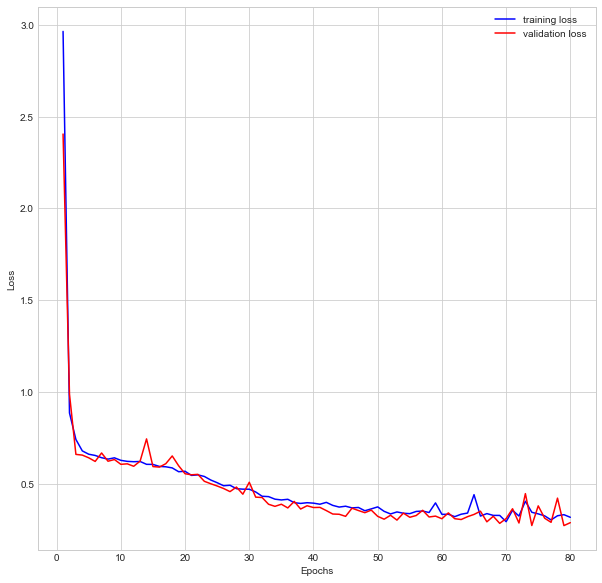

<Figure size 432x288 with 0 Axes>

In [20]:
plt.figure(figsize= (10,10))

plt.plot(epochs, history_df.loss, "b", label = "training loss")
plt.plot(epochs, history_df.val_loss, "r", label = "validation loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.savefig("loss")

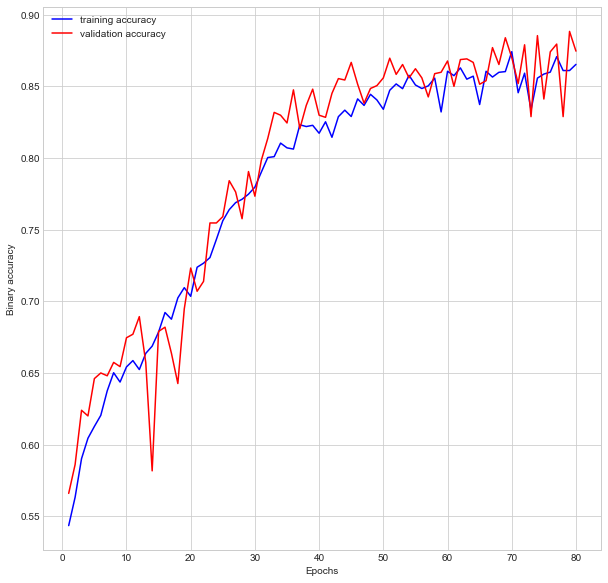

<Figure size 432x288 with 0 Axes>

In [21]:
plt.figure(figsize= (10,10))

plt.plot(epochs, history_df.binary_accuracy, "b", label = "training accuracy")
plt.plot(epochs, history_df.val_binary_accuracy, "r", label = "validation accuracy")

plt.xlabel("Epochs")
plt.ylabel("Binary accuracy")
plt.legend()
plt.show()
plt.savefig("accuracy")

In [22]:
print("Best validation loss: {:0.4f}, \n Best validation accuracy: {:0.4f}".format(history_df.val_loss.min(), history_df.val_binary_accuracy.max()))

Best validation loss: 0.2708, 
 Best validation accuracy: 0.8884


In [23]:
history_df.val_loss.idxmin() == history_df.val_binary_accuracy.idxmax()

True

In [24]:
history_df.val_binary_accuracy.idxmax()

78

In [25]:
model.save("COT-64x3CNN.model")

INFO:tensorflow:Assets written to: COT-64x3CNN.model\assets
